## Projective algorithm

In [ ]:
from py_alf import ALF_source, Simulation

This loop generates 3 different simulations, one for each $\tau\in\{0.05,0.1,0.15\}$.

In [ ]:
import os
# dtaus = [0.05, 0.1, 0.15]
dtaus = [0.05]
thetas = [5, 10, 20]
sims = [
    Simulation(
        ALF_source(),
        'Hubbard',
        {
            'Model': 'Hubbard',
            'Lattice_type': 'N_leg_ladder',
            'L1': 4,
            'L2': 1,
            'Checkerboard': False,
            'Symm': True,
            'Projector': True,
            'Theta':theta,
            'ham_T': 1.0,
            'ham_U': 4.0,
            'ham_Tperp': 0.0,
            'beta': 1.0,
            'Ltau': 0,
            'NSweep': 500,
            'NBin': 10,
            'Dtau': dtau,
            'Mz': True,
        },
    )
    for dtau in dtaus for theta in thetas]

# sims[0].compile()  # this is only needed if no crutial changes in sim dict have been made

In [8]:
for sim in sims:
    sim.run()

In [9]:
import pandas as pd

df = pd.DataFrame(columns=['E', 'dE', 'dtau', 'theta', 'cb', 's', 'mz'])
for sim in sims:
    sim.analysis()
    dict = sim.sim_dict
    obs = sim.get_obs()
    dtau = dict['Dtau']
    cb = dict['Checkerboard']
    s = dict['Symm']
    mz = dict['Mz']
    theta = dict['Theta']
    val = obs['Ener_scal0'].iloc[0]
    err = obs['Ener_scal0_err'].iloc[0]
    df = df.append({'E': val, 'dE': err, 'dtau': dtau, 'theta': theta, 'cb': cb, 's': s, 'Mz': mz}, ignore_index=True)


### Analyzing /home/andreas/myALF/ALF_data/Hubbard_N_leg_ladder_L1=4_L2=1_Checkerboard=False_Symm=True_Projector=True_Theta=5_T=1.0_U=4.0_Tperp=0.0_beta=1.0_Dtau=0.05_Mz=True ###
/home/andreas/myALF
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
/home/andreas/myALF/ALF_data/Hubbard_N_leg_ladder_L1=4_L2=1_Checkerboard=False_Symm=True_Projector=True_Theta=5_T=1.0_U=4.0_Tperp=0.0_beta=1.0_Dtau=0.05_Mz=True
### Analyzing /home/andreas/myALF/ALF_data/Hubbard_N_leg_ladder_L1=4_L2=1_Checkerboard=False_Symm=True_Projector=True_Theta=10_T=1.0_U=4.0_Tperp=0.0_beta=1.0_Dtau=0.05_Mz=True ###
/home/andreas/myALF
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
/home/andreas/myALF/ALF_data/Hubbard_N_leg_ladder_L1=4_L2=1_Checkerboard=False_Symm=Tr

No handles with labels found to put in legend.


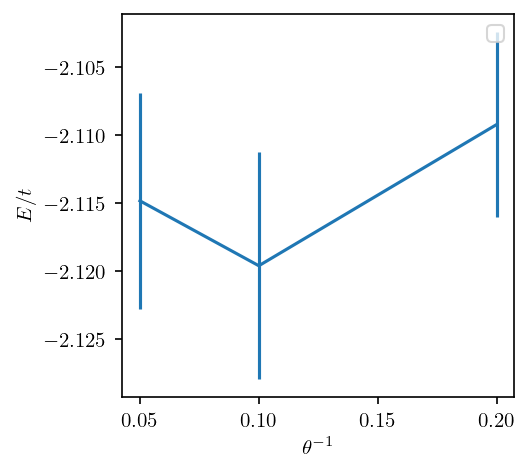

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
mpl.rcParams['figure.dpi'] = 150
figsize=np.asarray(((3+3/8), (3+3/8)))

plt.figure(figsize=figsize)
ax = plt.subplot()
# for theta in thetas:
#         data = df[(df['theta']==theta)]
#         ax.errorbar(data['theta'], data['E'], data['dE'])
ax.errorbar(1/df['theta'], df['E'], df['dE'])
ax.legend()
ax.set_xlabel('$\\theta^{-1}$')
ax.set_ylabel('$E/t$')
plt.show()